# Visualizations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('../Data/final_data_cleaned.csv')
flsi_percentiles = pd.read_csv('../Data/percentiles.csv')

## Graph 1: Flexion LSI over time

When it comes to a **patient** understanding **their** ACLR recovery, being able to visually see changes across time makes understanding their recovery progress easier. Through a line plot, a patient can visually see that progression over multiple visits, allowing them to notice any irregularities that go against the general pattern, which is usually an increase in the recovery statistic. Additionally, having a background population of patients who also underwent ACLR surgery acts as a comparison point, allowing them to compare themselves to a group of people who have gone through a similar recovery process. Having the patient be able to picture themselves in the data is important, as we want for them to understand where they stand in recovery without explicitly knowing miniscule details about medical terminology. Sometimes, seeing yourself as a positive sloping line among a positive sloping population is enough to understand that recovery is going smoothly.

This is a line graph that captures a single patient's recovery progress for Flexion LSI (using a randomly chosen patient with at least 4 visits). Additionally, it has Flexion LSI data over visits from all the patients in the study, which acts as a comparison point for the patient. The population data is shaded to show the IQR, which is the 25th to 75th percentile. My goal is for the patient to be able to picture himself/herself in recovery and understand that test results usually get better over time.

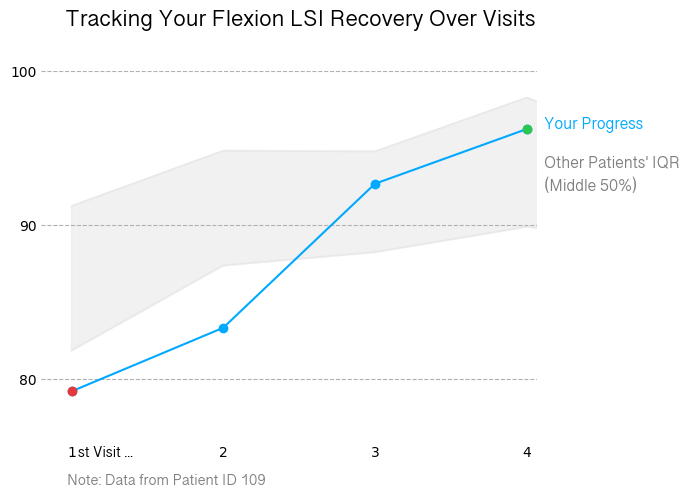

In [2]:
# Plot IQR 25 to 75, and fill the space between
plt.plot(flsi_percentiles['visit_num'], flsi_percentiles['q25'], color="#E5E5E5", alpha=0.5)
plt.plot(flsi_percentiles['visit_num'], flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5)
plt.fill_between(flsi_percentiles['visit_num'], 
                 flsi_percentiles['q25'], 
                 flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5, label = 'patients')

# Choose a patient to showcase their recovery progress
highlight_data = data[data['record_id'] == 109]

# Line plot of recovery
plt.plot(highlight_data['visit_num'], highlight_data['lsi_flex_isok_60'],
         linestyle='-', marker='o', color='#00A9FF', label='You')

# Add colored dots
plt.plot(highlight_data['visit_num'].iloc[0], highlight_data['lsi_flex_isok_60'].iloc[0], marker='o', color='#E5383B', markersize=6)
plt.plot(highlight_data['visit_num'].iloc[3], highlight_data['lsi_flex_isok_60'].iloc[3], marker='o', color='#2DC653', markersize=6)

# Add titles/labels/text
plt.title('Tracking Your Flexion LSI Recovery Over Visits', weight='bold', size=17, x=0.522, y=1.1, fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.76, 'Your Progress', size = 12, color='#00A9FF', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.68, "Other Patients' IQR", size = 12, color='gray', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.63, "(Middle 50%)", size = 12, color='gray', fontfamily='Sinhala Sangam MN')
plt.figtext(0.182, 0.0755, "st Visit ...", size = 11, color='black', fontfamily='Sinhala Sangam MN')
plt.figtext(0.165, 0.019, "Note: Data from Patient ID 109", size = 11, color='gray', fontfamily='Sinhala Sangam MN')

# Customize graph
plt.xlim(.8, 4.07)
plt.xticks([1, 2, 3, 4])
plt.ylim(76, 100)
plt.yticks([80, 90, 100])

plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.grid(axis='y', linestyle = '--')

# Save final image
plt.savefig("./graph_images/lsi_flexion_line.png", bbox_inches='tight')

## Graph 1 Continued: Line Plot Series

As a continuation from the first graph, this visualization shows subplots of three LSI (limb symmetry index) scores across visits. Patients may find it helpful to see how their different functional assessments differ. The goal of this graph is for the patient to easily see their improvements or deficiencies.

In [11]:
# Create data for subplots

# Extension LSI
# Find the 25th and 75th percentile for each visit (1,2,3,4,...)
elsi_percentiles = data.groupby('redcap_event_name')['lsi_ext_isok_60'].agg(mean='mean',q25='quantile', q75='quantile').reset_index()
elsi_percentiles['q25'] = data.groupby('redcap_event_name')['lsi_ext_isok_60'].quantile(0.40).values
elsi_percentiles['q75'] = data.groupby('redcap_event_name')['lsi_ext_isok_60'].quantile(0.60).values

visit_map = {
    'visit_1_arm_1': 1,
    'visit_2_arm_1': 2,
    'visit_3_arm_1': 3,
    'visit_4_arm_1': 4,
    'visit_5_arm_1': 5,
    'visit_6_arm_1': 6,
    'visit_7_arm_1': 7,
    'visit_8_arm_1': 8,
    'visit_9_arm_1': 9}

# Create a new column with just the visit number
elsi_percentiles['visit_num'] = elsi_percentiles['redcap_event_name'].map(visit_map)
elsi_percentiles['visit_num'] = pd.to_numeric(elsi_percentiles['visit_num'], errors='coerce').astype('Int64')
elsi_percentiles = elsi_percentiles[elsi_percentiles['redcap_event_name'] != 'data_upload_arm_2'] # remove unneeded values

# SH LSI
# Find the 25th and 75th percentiles
sh_lsi_percentiles = data.groupby('redcap_event_name')['sh_lsi'].agg(q25=lambda x: x.quantile(0.4), q75=lambda x: x.quantile(0.6)).reset_index()
sh_lsi_percentiles['visit_num'] = sh_lsi_percentiles['redcap_event_name'].map(visit_map)
sh_lsi_percentiles = sh_lsi_percentiles[sh_lsi_percentiles['redcap_event_name'] != 'data_upload_arm_2']

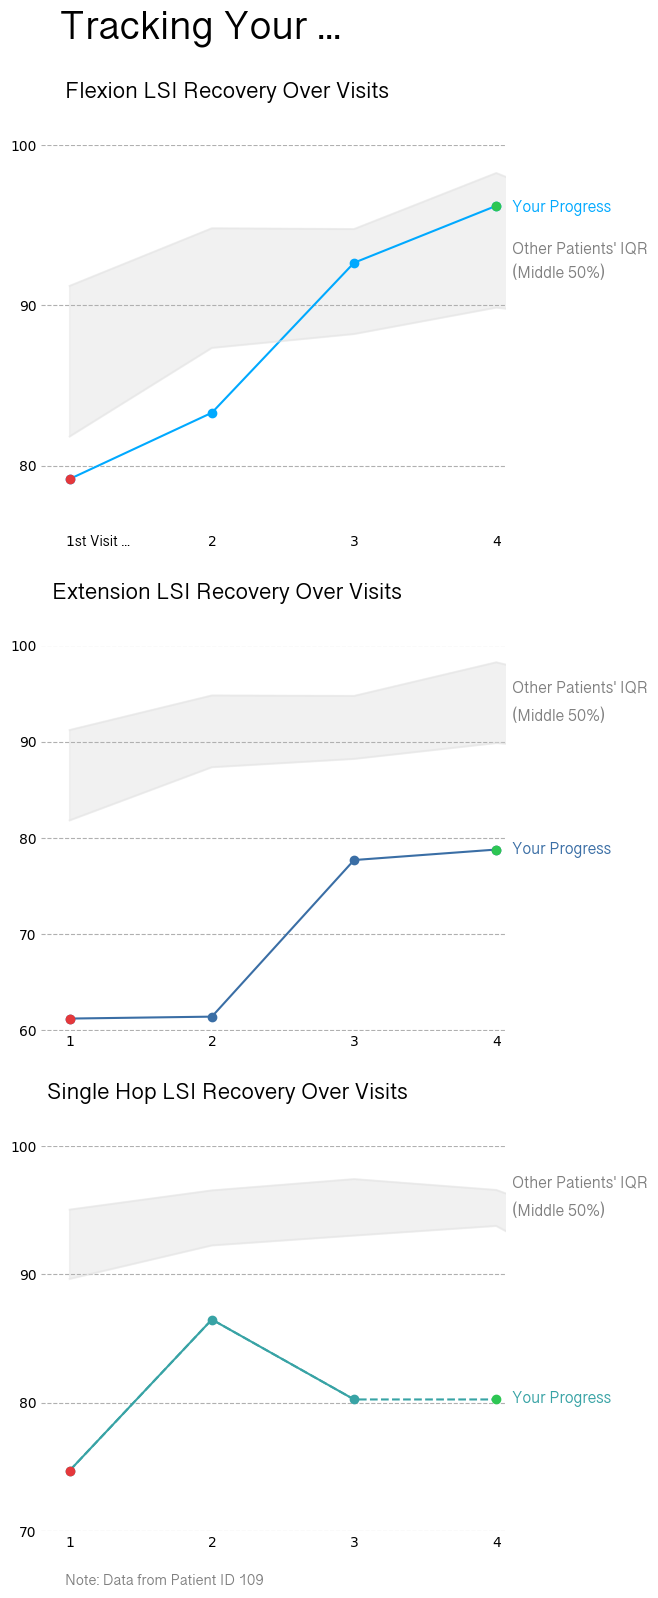

In [21]:
fig, axs = plt.subplots(3,1, figsize=(6, 18)) # set the figure size and have 3 small multiples within the figure

axs = axs.flatten()
highlight_data = data[data['record_id'] == 109] # use patient 109 for consistency

# Plot 1: Flexion LSI ---------------------------------------------------------------------------------------------------------------
axs[0].plot(highlight_data['visit_num'], highlight_data['lsi_flex_isok_60'], linestyle='-', marker='o', color='#00A9FF', label='You')

# Plot and fill in IQR data
axs[0].plot(flsi_percentiles['visit_num'], flsi_percentiles['q25'], color="#E5E5E5", alpha=0.5)
axs[0].plot(flsi_percentiles['visit_num'], flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5)
axs[0].fill_between(flsi_percentiles['visit_num'], 
                 flsi_percentiles['q25'], 
                 flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5, label = 'patients')

# Add colored dots
axs[0].plot(highlight_data['visit_num'].iloc[0], highlight_data['lsi_flex_isok_60'].iloc[0], marker='o', color='#E5383B', markersize=6)
axs[0].plot(highlight_data['visit_num'].iloc[3], highlight_data['lsi_flex_isok_60'].iloc[3], marker='o', color='#2DC653', markersize=6)

# Add title and customize graph
axs[0].set_title('Flexion LSI Recovery Over Visits', weight='bold', size=17, x=0.4, y=1.1, fontfamily='Sinhala Sangam MN')
axs[0].set_xlim(.8, 4.07)
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_ylim(76, 100)
axs[0].set_yticks([80, 90, 100])
axs[0].tick_params(axis='y', which='both',length=0)
axs[0].tick_params(axis='x', which='both',length=0)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].grid(axis='y', linestyle = '--')
plt.figtext(0.91, 0.843, 'Your Progress', size = 12, color='#00A9FF', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.82, "Other Patients' IQR", size = 12, color='gray', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.806, "(Middle 50%)", size = 12, color='gray', fontfamily='Sinhala Sangam MN')

# Plot 2: Extension LSI ---------------------------------------------------------------------------------------------------------------
axs[1].plot(highlight_data['visit_num'], highlight_data['lsi_ext_isok_60'], linestyle='-', marker='o', color='#3A6EA5', label='You')

# Plot and fill in IQR data
axs[1].plot(flsi_percentiles['visit_num'], flsi_percentiles['q25'], color="#E5E5E5", alpha=0.5)
axs[1].plot(flsi_percentiles['visit_num'], flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5)
axs[1].fill_between(flsi_percentiles['visit_num'], 
                 flsi_percentiles['q25'], 
                 flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5, label = 'patients')

# Add colored dots
axs[1].plot(highlight_data['visit_num'].iloc[0], highlight_data['lsi_ext_isok_60'].iloc[0], marker='o', color='#E5383B', markersize=6)
axs[1].plot(highlight_data['visit_num'].iloc[3], highlight_data['lsi_ext_isok_60'].iloc[3], marker='o', color='#2DC653', markersize=6)

# Add title and customize graph
axs[1].set_title('Extension LSI Recovery Over Visits', weight='bold', size=17, x=0.4, y=1.1, fontfamily='Sinhala Sangam MN')
axs[1].set_xlim(.8, 4.07)
axs[1].set_xticks([1, 2, 3, 4])
axs[1].set_ylim(60, 100)
axs[1].set_yticks([60, 70, 80, 90, 100])
axs[1].tick_params(axis='y', which='both',length=0)
axs[1].tick_params(axis='x', which='both',length=0)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].grid(axis='y', linestyle = '--')
plt.figtext(0.91, 0.486, 'Your Progress', size = 12, color='#3A6EA5', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.576, "Other Patients' IQR", size = 12, color='gray', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.56, "(Middle 50%)", size = 12, color='gray', fontfamily='Sinhala Sangam MN')

# Plot 3: Single Hop LSI ---------------------------------------------------------------------------------------------------------------
interpolated_sh_lsi = highlight_data['sh_lsi'].interpolate() # Interpolate values because patient did not test for single hop lsi on 4th visit
axs[2].plot(highlight_data['visit_num'], highlight_data['sh_lsi'], linestyle='-', marker='o', color='#38A3A5', label='You')
axs[2].plot(highlight_data['visit_num'], interpolated_sh_lsi, linestyle='--', color='#38A3A5', label='Interpolated Data')

# Plot and fill in IQR data
axs[2].plot(sh_lsi_percentiles['visit_num'], sh_lsi_percentiles['q25'], color="#E5E5E5", alpha=0.5)
axs[2].plot(sh_lsi_percentiles['visit_num'], sh_lsi_percentiles['q75'], color="#E5E5E5", alpha=0.5)
axs[2].fill_between(sh_lsi_percentiles['visit_num'], 
                 sh_lsi_percentiles['q25'], 
                 sh_lsi_percentiles['q75'], color="#E5E5E5", alpha=0.5, label = 'patients')

# Add colored dots
axs[2].plot(highlight_data['visit_num'].iloc[0], highlight_data['sh_lsi'].iloc[0], marker='o', color='#E5383B', markersize=6)
axs[2].plot(highlight_data['visit_num'].iloc[3], interpolated_sh_lsi.iloc[3], marker='o', color='#2DC653', markersize=6)

# Add title and customize graph
axs[2].set_title('Single Hop LSI Recovery Over Visits', weight='bold', size=17, x=0.4, y=1.1, fontfamily='Sinhala Sangam MN')
axs[2].set_xlim(.8, 4.07)
axs[2].set_xticks([1, 2, 3, 4])
axs[2].set_ylim(70, 100)
axs[2].set_yticks([70, 80, 90, 100])
axs[2].tick_params(axis='y', which='both',length=0)
axs[2].tick_params(axis='x', which='both',length=0)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].grid(axis='y', linestyle = '--')
plt.figtext(0.91, 0.181, 'Your Progress', size = 12, color='#38A3A5', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.301, "Other Patients' IQR", size = 12, color='gray', fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.285, "(Middle 50%)", size = 12, color='gray', fontfamily='Sinhala Sangam MN')

# Overall graph customizations ---------------------------------------------------------------------------------------------------------------
plt.figtext(0.182, 0.657, "st Visit ...", size = 11, color='black', fontfamily='Sinhala Sangam MN')
plt.figtext(0.165, 0.08, "Note: Data from Patient ID 109", size=11, color='gray', fontfamily='Sinhala Sangam MN')
plt.suptitle('Tracking Your ...', weight='bold', fontfamily='Sinhala Sangam MN', size=30, x=0.39, y=.955)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(hspace=0.3)

# Save final image
plt.savefig('./graph_images/line_series.png', bbox_inches='tight')

## Graph 2: Probability Distribution of ACL-RSI scores
Though the lineplot is useful for showcasing an individual patient's progress over time, it is not effective for portraying the distribution of the ACL-RSI scores; therefore, we want to use a kernel density estimate plot stratified by visit number. We deliberately excluded 5th, 7th, 7th, 8th, and 9th visits to keep consistency with the line plots.

Compared to line plots, the KDEplot is less familiar most people, and it will most certainly be unfamiliar to our target audience. Therefore, our graph includes an explanation of what it is supposed to portray. We hope that our visualization will demonstrate that people are *more likely* to have higher ACL-RSI scores as time passes and reassure patients who fear they will never feel ready to return to sport.

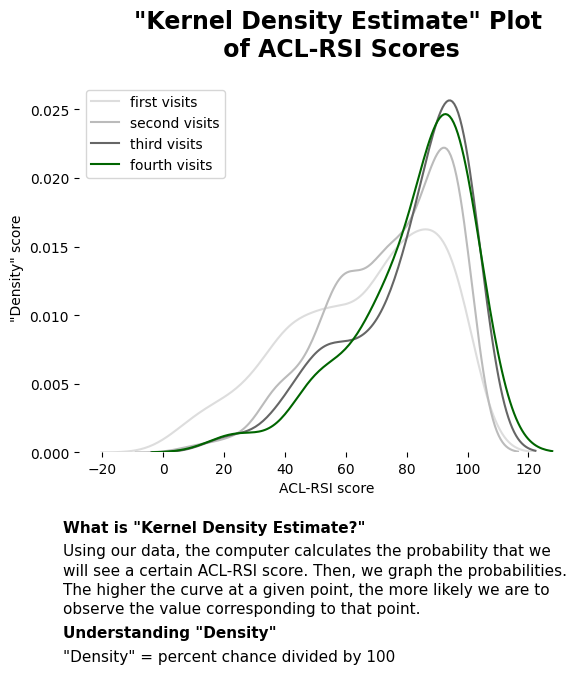

In [24]:
# plotting kernel density estimate plots
sns.kdeplot(data=data.where(data["visit_num"]==1).dropna(), x="acl_rsi", color="#DDDDDD")
sns.kdeplot(data=data.where(data["visit_num"]==2).dropna(), x="acl_rsi", color="#BBBBBB")
sns.kdeplot(data=data.where(data["visit_num"]==3).dropna(), x="acl_rsi", color="#666666")
sns.kdeplot(data=data.where(data["visit_num"]==4).dropna(), x="acl_rsi", color="#006500")

# customising text
plt.title('"Kernel Density Estimate" Plot\n of ACL-RSI Scores', weight='bold', size=17, x=0.522, y=1.05)
plt.xlabel("ACL-RSI score")
plt.ylabel('"Density" score')

# clarifying notes for the audience on what "kde" is for our "audience"
plt.figtext(0.100, -0.0555, 'What is "Kernel Density Estimate?"', size = 11, color='black', weight="bold")
plt.figtext(0.100, -0.105, 'Using our data, the computer calculates the probability that we', size = 11, color='black')
plt.figtext(0.100, -0.145, 'will see a certain ACL-RSI score. Then, we graph the probabilities.', size = 11, color='black')
plt.figtext(0.100, -0.185, 'The higher the curve at a given point, the more likely we are to', size = 11, color='black')
plt.figtext(0.100, -0.225, 'observe the value corresponding to that point.', size = 11, color='black')
plt.figtext(0.100, -0.275, 'Understanding "Density"', size = 11, color='black', weight="bold")
plt.figtext(0.100, -0.3245, '"Density" = percent chance divided by 100', size = 11, color='black')

# violently despining the graph lol 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# legend
plt.legend(["first visits", "second visits", "third visits", "fourth visits"])

# Save final image
plt.savefig('./graph_images/kde_aclrsi.png', bbox_inches='tight')

## Distribution of LSI Extension Strength by Age Group

The box plot offers a more familiar and straightforward way to visualize data for our target audience of young athletes. Each box represents the interquartile range (IQR) of LSI Extension Strength (60°/s) within an age group, while the whiskers show variability and the dots highlight outliers. This format allows patients and their families to quickly understand how their strength compares to others in their age group. The visualization reassures patients that some variation is normal and that most people fall within a certain performance band, particularly as they progress in recovery. By stratifying the data by age group, we emphasize that strength recovery can vary with age, which is helpful for setting age-appropriate expectations during rehab.

/var/folders/y3/qpldbqrx2dn72lflj336s6l00000gn/T/ipykernel_83741/1802104442.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


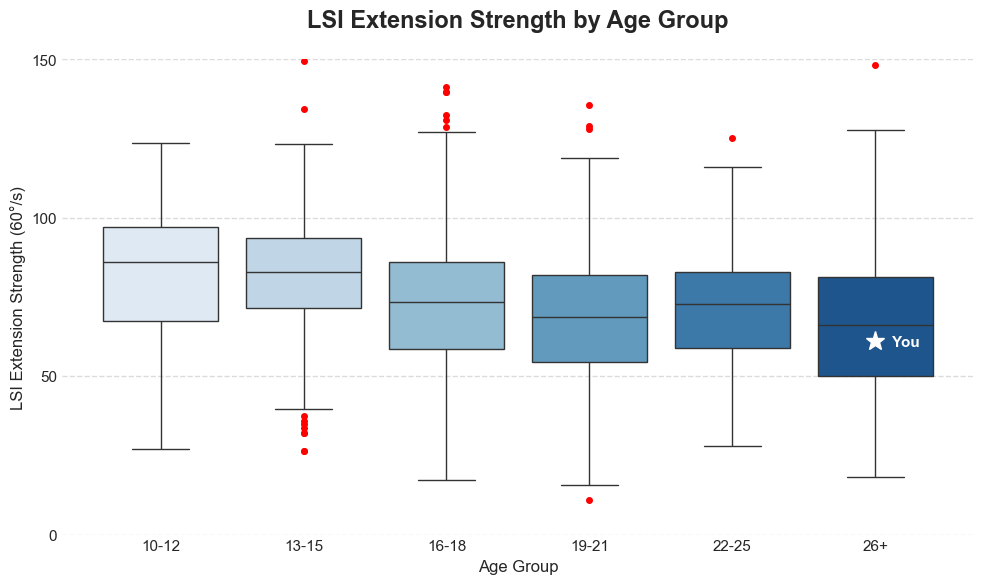

<Figure size 640x480 with 0 Axes>

In [44]:
bins = [0, 12, 15, 18, 21, 25, 100]
labels = ['10-12', '13-15', '16-18', '19-21', '22-25', '26+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

box_data = data[['age_group', 'lsi_ext_isok_60']].dropna()
box_data = box_data[box_data['age_group'].isin(labels)]

age_order = labels  # you already have them in the right order

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='red', markersize=4, linestyle='none')

ax = sns.boxplot(
    x='age_group',
    y='lsi_ext_isok_60',
    data=box_data,
    palette="Blues",
    flierprops=flierprops,
    order=age_order  
)

ax.set_title('LSI Extension Strength by Age Group', weight='bold', size=17, x=0.5, y=1.05)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('LSI Extension Strength (60°/s)', fontsize=12)

plt.ylim(0, 150)
plt.yticks([0, 50, 100, 150])
plt.tick_params(axis='y', which='both', length=0)
plt.tick_params(axis='x', which='both', length=0)

for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot the patient as a star
# Get the patient's row
patient_row = data[(data['record_id'] == 109) & (data['visit_num'] == 1)].iloc[0]
patient_age_group = patient_row['age_group']
patient_value = patient_row['lsi_ext_isok_60']
# Get the value's position 
x_plot_pos = labels.index(patient_age_group)
# Plot the star
ax.plot(x_plot_pos, patient_value, marker='*', color='white', markersize=14, label='Patient 109')
plt.figtext(0.9, .41, 'You', weight = 'bold', size = 11, color='white')

plt.show()

# Save final image
plt.savefig('./graph_images/boxplots.png', bbox_inches='tight')